# Определение возраста покупателей

**Описание проекта**


Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. 
Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import os
import matplotlib.image as mpimg


### Загрузка данных

In [2]:
pth1 = f'/datasets/faces/labels.csv'
pth2 = f'D:/Данные/labels.csv'
pth3 = f'C:/Датафреймы python/real and apparent age/labels.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data  = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data  = pd.read_csv(pth3)
else:
    print('Something is wrong')
    
display(data.head(2))
display(data.tail(2))
data.info()    


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18


,file_name,real_age
7589,007611.jpg,20
7590,007612.jpg,47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [3]:
data.duplicated().sum()

0

### Распределение возраста в датасете

In [4]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<Figure size 432x288 with 0 Axes>

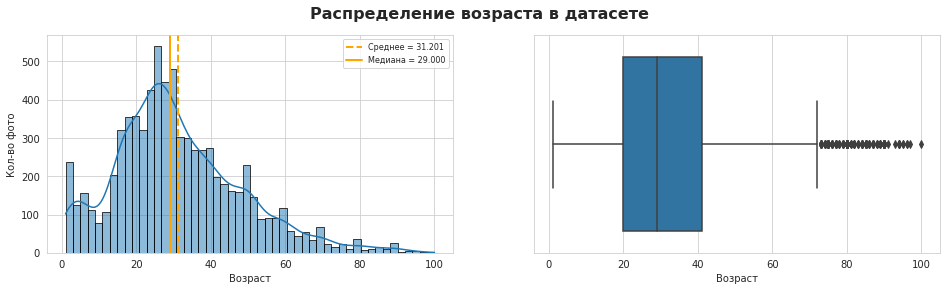

In [5]:
col = data['real_age']

mean_value = col.mean()
median_value = col.median()

x_label = 'Возраст'
y_label = 'Кол-во фото'
title = 'Распределение возраста в датасете'

sns.set_style("whitegrid")

plt.figure()
fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (16,4))
sns.histplot(data = data, x = col, ax=axs[0], kde=True, bins = 50, legend=True ,   palette='viridis', edgecolor='black')
axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
axs[0].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[0].legend(fontsize="8")
        
sns.boxplot(data = data, x = col, ax=axs[1]);
axs[1].set_xlabel(x_label)
fig.suptitle(title, fontsize=16, weight='bold')    

plt.show()
    

In [6]:
def group_new(row):
    if row['real_age'] < 7 :
        return  'младше 7 лет'
    elif 7 <= row['real_age'] < 18 :
        return  'от 7 до 17 лет'
    elif 18 <= row['real_age'] < 25 :
        return  'от 18 до 24 лет'
    elif 25 <= row['real_age'] < 60 :
        return  'от 25 до 59 лет'
    else :
        return  'от 60 лет и старше'
        
data['age_group'] = data.apply(group_new, axis=1)


In [7]:
pivot_table = data.groupby('age_group').agg(
            cnt=('age_group', 'count') 
).reset_index()

pivot_table

,age_group,cnt
0,младше 7 лет,518
1,от 18 до 24 лет,1297
2,от 25 до 59 лет,4270
3,от 60 лет и старше,521
4,от 7 до 17 лет,985


In [8]:
new_order = [0, 4, 1, 2, 3] 
pivot_table = pivot_table.iloc[new_order].reset_index(drop=True)

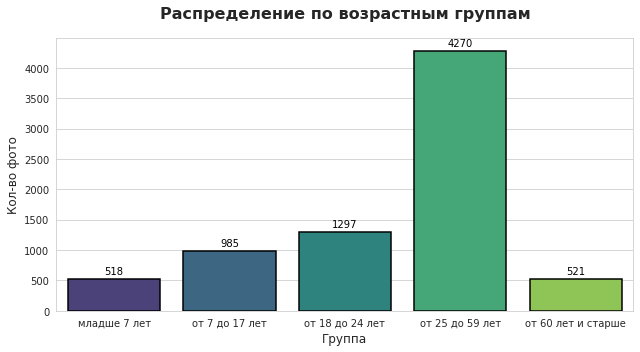

In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(9, 5))
ax = sns.barplot(
    x='age_group', 
    y='cnt', 
    data=pivot_table, 
    palette='viridis', 
    edgecolor='black', 
    linewidth=1.5      
)

plt.title('Распределение по возрастным группам', fontsize=16, weight='bold', pad=20)
plt.xlabel('Группа', fontsize=12)
plt.ylabel('Кол-во фото', fontsize=12)

for i, v in enumerate(pivot_table['cnt']):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()

plt.show()

### Просмотр примеров фото датасета

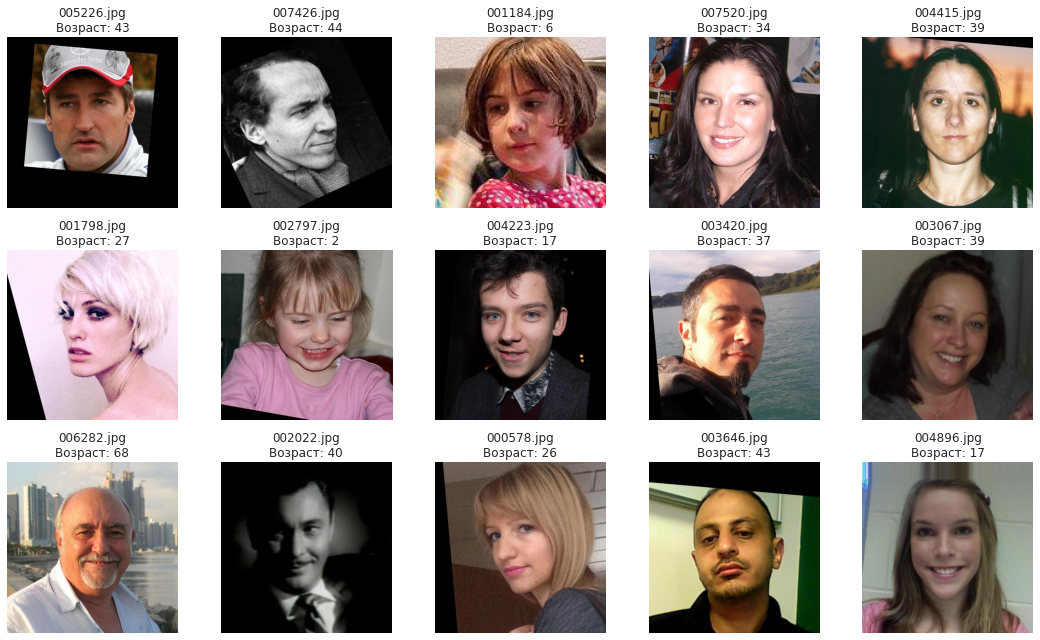

In [11]:
data.set_index('file_name', inplace=True)

pth1 = f'/datasets/faces/final_files'
pth2 = f'C:/Датафреймы python/real and apparent age/final_files/final_files'

if os.path.exists(pth1):
    folder_path = pth1
elif os.path.exists(pth2):
    folder_path  = pth2
else:
    print('Something is wrong')
    
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

plt.figure(figsize=(15, 9)) 

for i, image_file in enumerate(image_files[:15]):
    real_age = data.loc[image_file, 'real_age']
    
    img = mpimg.imread(os.path.join(folder_path, image_file))
    
    row = i // 5 
    col = i % 5  
     
    plt.subplot(3, 5, i + 1)  
    plt.imshow(img)
    plt.title(f"{image_file}\nВозраст: {real_age}", fontsize=12)  
    plt.axis('off') 

plt.tight_layout()  
plt.show()

### Вывод

Датасет содержит 7591 изображение людей и текстовый файл с указанием возраста человека, изображенного на фото.
Датафрейм не содержит пропусков и дублей.

Возраст людей из выборки распределяется от 1 до 100 лет. Средний возраст - 29 лет.

Визуализация распределения по возрастным группам показала:
- в датасете есть около 7 % фото детей дошкольного возраста. Данные фото не помогут в достижении бизнес-целей проекта, т.к. дети до 7 лет вряд ли самостоятельно совершают покупки.  
- самая многочисленная группа - люди от 25 до 59 лет (доля изображений 56 %), это люди трудоспособного возраста, т.е. самая платежеспособная группа. Обучение модели на большом количестве изображений людей из данной возрастной группы позволит лучше определять людей этого возраста, и таким образом, супермаркет сможет увеличить прибыль, т.к. будет аккуратно предлагать дополнительные товары, которые могут заинтересовать покупателей этой возрастной группы.
- одной из целей исследования является обучение модели для контроля добросовестности кассиров при продаже алкоголя. Однако доля изображений детей и подростков от 7 до 17 лет в	датасете лишь 13 % от общего количества.

Фото имеют специфические особенности: есть отличие в освещенности помещения или времени дня, если фото сделано на улице, цветопередаче (цветные и черно-белые фото), размере лица в кадре, наличие рамки, затемененных углов, повернуто ли изображение или нет, присутствует ли ретушь на фото.

Исходя из этого, при обучении модели необходимо применить техники аугментации изображений: сдвиги, повороты, масштабирование, изменение яркости.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.resnet import ResNet50


def load_train(path):
    
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                      rescale=1/255,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      horizontal_flip=True,
                                      zoom_range=0.2,
                                      brightness_range=[0.8, 1.2],
                                      shear_range=10,
                                       fill_mode='nearest')
       
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col="file_name",
        y_col="real_age",
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    
    return train_datagen_flow


def load_test(path):
    
    test_datagen = ImageDataGenerator(validation_split=0.25,
                                      rescale=1/255)
       
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col="file_name",
        y_col="real_age",
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    
    return test_datagen_flow


def create_model(input_shape):
    
    optimizer = Adam(learning_rate=0.0001) 
    
    backbone = ResNet50(input_shape=(224, 224, 3),
                   weights = '/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', #'imagenet',
                   include_top=False)

    for layer in backbone.layers[:-10]:
        layer.trainable = True #False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='relu')
    ])

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=6,
               steps_per_epoch=None, validation_steps=None):    

    train_datagen_flow = train_data
    test_datagen_flow = test_data
    
    
    model.fit(train_datagen_flow,
              validation_data=test_data,
              batch_size=batch_size, 
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              epochs=epochs,
              verbose=2) 
    return model

```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Train for 178 steps, validate for 60 steps
Epoch 1/6
178/178 - 136s - loss: 257.1150 - mae: 11.7223 - val_loss: 759.6744 - val_mae: 22.6361
Epoch 2/6
178/178 - 130s - loss: 119.5455 - mae: 8.3007 - val_loss: 627.1022 - val_mae: 19.9472
Epoch 3/6
178/178 - 121s - loss: 95.1713 - mae: 7.3943 - val_loss: 243.5394 - val_mae: 11.7321
Epoch 4/6
178/178 - 121s - loss: 87.8501 - mae: 7.1539 - val_loss: 136.4333 - val_mae: 8.9855
Epoch 5/6
178/178 - 121s - loss: 75.1161 - mae: 6.6370 - val_loss: 91.8865 - val_mae: 7.2295
Epoch 6/6
178/178 - 123s - loss: 67.2201 - mae: 6.2432 - val_loss: 79.4660 - val_mae: 6.6953

60/60 - 11s - loss: 79.4660 - mae: 6.6953
```

## Анализ обученной модели

Была построена и обучена свёрточная нейронная сеть на датасете с фотографиями людей. Модель в среднем ошибается в предсказании  возраста на 6,7 лет. (Значение метрики MAE на тестовой выборке = 6.6953).

Для целей анализа покупок и предложения товаров, которые могут заинтересовать покупателей определенной возрастной группы,  ошибка в 7 лет в предсказании возраста - не критичный показатель. 

Однако для контроля добросовестности кассиров при продаже алкоголя разница между реальным и предсказанным возрастом в 7 лет является существенной. Вряд ли возможно обучить модель так, чтобы она точно предсказывала возраст покупателя. Но уменьшить ошибку в предсказании так, чтобы модель точнее предсказывала возраст людей около 18 лет, возможно, обучив модель на большем количестве фото людей данной возрастной группы.
